# Comparing Signal Word Counts
- without punctuation
- not corrected

| Greetings | Thanks    | Please | Sorry | Okay | Slang    | Other |
|-----------|-----------|--------|-------|------|----------|-------|
| hey       | Thanks    | please | sorry | ok   | LOL      | ah    |
| hi        | Thank you | pls    | sry   | okay | sry      | help  |
| hello     |           | plz    |       |      | Cool     | yes   |
|           |           |        |       |      | Shitty   | no    |
|           |           |        |       |      | Tho      | but   |
|           |           |        |       |      | Nah      |       |
|           |           |        |       |      | WTF      |       |
|           |           |        |       |      | Eh       |       |
|           |           |        |       |      | Bullshit |       |
|           |           |        |       |      | Nope     |       |
|           |           |        |       |      | yayyy    |       |
|           |           |        |       |      | nice     |       |


In [1]:
import pandas as pd
import sqlite3
import os

from helpers.normalization import remove_punctuation, remove_punctuation_and_newlines
from helpers.stats import run_t_test_on_gender

db_path = "../../giicg.db"
if not os.path.exists(db_path):
    raise FileNotFoundError(f"Database file does not exist: {db_path}")

conn = sqlite3.connect(db_path)
prompts = pd.read_sql("SELECT ep.*, u.age, u.work_exp_years FROM expanded_prompts ep JOIN users u ON ep.user_id = u.user_id", conn)
prompts['conversational'] = prompts['conversational'].apply(lambda x: remove_punctuation_and_newlines(x))
user_prompts = (
    prompts
    .fillna({'work_exp_years': 'None'})
    .groupby(['user_id', 'gender', 'age', 'work_exp_years'])['conversational']
    .apply(' '.join)
    .reset_index()    # Reset index to create a DataFrame
)
user_prompts

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,user_id,gender,age,work_exp_years,conversational
0,6,Man (cisgender),19-25,3.0,parsing data from python iterator how it could...
1,11,Woman (cisgender),26-30,1.0,Can you adapt the following code so that inste...
2,15,Man (cisgender),26-30,6.0,SETALLTABLES action is currently not fetching ...
3,16,Woman (cisgender),19-25,None,I want to use Dummy Hot encoding to replace th...
4,25,Man (cisgender),26-30,6.0,what is the best way to encode and compress a ...
5,28,Woman (cisgender),31-35,5.0,I have a pandas dataframe like this I want to...
6,30,Non-binary,26-30,None,as a NLP and LLM researcher I am recently down...
7,31,Man (cisgender),36-40,22.0,How can I make use of an ObservableHQDatabaseC...
8,34,Man (cisgender),51-60,20.0,Blender and Python I have a collection of hund...
9,46,Man (cisgender),31-35,12.0,how to run a Python future without blocking ie...


In [2]:
from helpers.occurences import count_occurrences

words = ['hey', 'hi', 'hello', 'thanks', 'thank you', 'please', 'pls', 'plz', 'sorry', 'sry', 'okay', 'ok', 'lol', 'cool', 'shitty', 'tho', 'nah', 'wtf', 'eh', 'bullshit', 'nope', 'yayyy', 'nice', 'ah', 'help', 'yes', 'no', 'but', 'you', 'i', 'me', 'we']

user_prompts['n_words'] = user_prompts['conversational'].apply(lambda x: len(x.split()))

for word in words:
    user_prompts[word] = user_prompts.apply(
        lambda row: count_occurrences(row['conversational'], word) / row['n_words']
        if row['n_words'] > 0 else 0,
        axis=1
    )


user_prompts['greetings'] = user_prompts['hey'] + user_prompts['hi'] + user_prompts['hello']
user_prompts['thanks_grouped'] = user_prompts['thanks'] + user_prompts['thank you']
user_prompts['please_grouped'] = user_prompts['please'] + user_prompts['pls'] + user_prompts['plz']
user_prompts['sorry'] = user_prompts['sorry'] + user_prompts['sry']
user_prompts['okay_grouped'] = user_prompts['okay'] + user_prompts['ok']
user_prompts['slang'] = user_prompts['lol'] + user_prompts['cool'] + user_prompts['shitty'] + user_prompts['tho'] + user_prompts['nah'] + user_prompts['wtf'] + user_prompts['eh'] + user_prompts['bullshit'] + user_prompts['nope'] + user_prompts['yayyy'] + user_prompts['nice']

user_prompts

,user_id,gender,age,work_exp_years,conversational,n_words,hey,hi,hello,thanks,...,but,you,i,me,we,greetings,thanks_grouped,please_grouped,okay_grouped,slang
0,6,Man (cisgender),19-25,3.0,parsing data from python iterator how it could...,192,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.015625,0.000000,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000
1,11,Woman (cisgender),26-30,1.0,Can you adapt the following code so that inste...,193,0.000000,0.000000,0.0,0.000000,...,0.015544,0.041451,0.031088,0.005181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,15,Man (cisgender),26-30,6.0,SETALLTABLES action is currently not fetching ...,36,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,16,Woman (cisgender),19-25,None,I want to use Dummy Hot encoding to replace th...,541,0.000000,0.000000,0.0,0.000000,...,0.005545,0.007394,0.051756,0.001848,0.000000,0.000000,0.000000,0.007394,0.007394,0.000000
4,25,Man (cisgender),26-30,6.0,what is the best way to encode and compress a ...,106,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.028302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,28,Woman (cisgender),31-35,5.0,I have a pandas dataframe like this I want to...,562,0.000000,0.001779,0.0,0.007117,...,0.005338,0.014235,0.039146,0.010676,0.001779,0.001779,0.007117,0.007117,0.001779,0.001779
6,30,Non-binary,26-30,None,as a NLP and LLM researcher I am recently down...,92,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.043478,0.021739,0.000000,0.000000,0.000000,0.010870,0.000000,0.000000
7,31,Man (cisgender),36-40,22.0,How can I make use of an ObservableHQDatabaseC...,92,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.032609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,34,Man (cisgender),51-60,20.0,Blender and Python I have a collection of hund...,1299,0.000000,0.000000,0.0,0.000000,...,0.010778,0.006928,0.020015,0.000000,0.000770,0.000000,0.000000,0.003079,0.000000,0.000770
9,46,Man (cisgender),31-35,12.0,how to run a Python future without blocking ie...,69,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Compare Genders

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_57641/4169596621.py:31: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.boxplot(


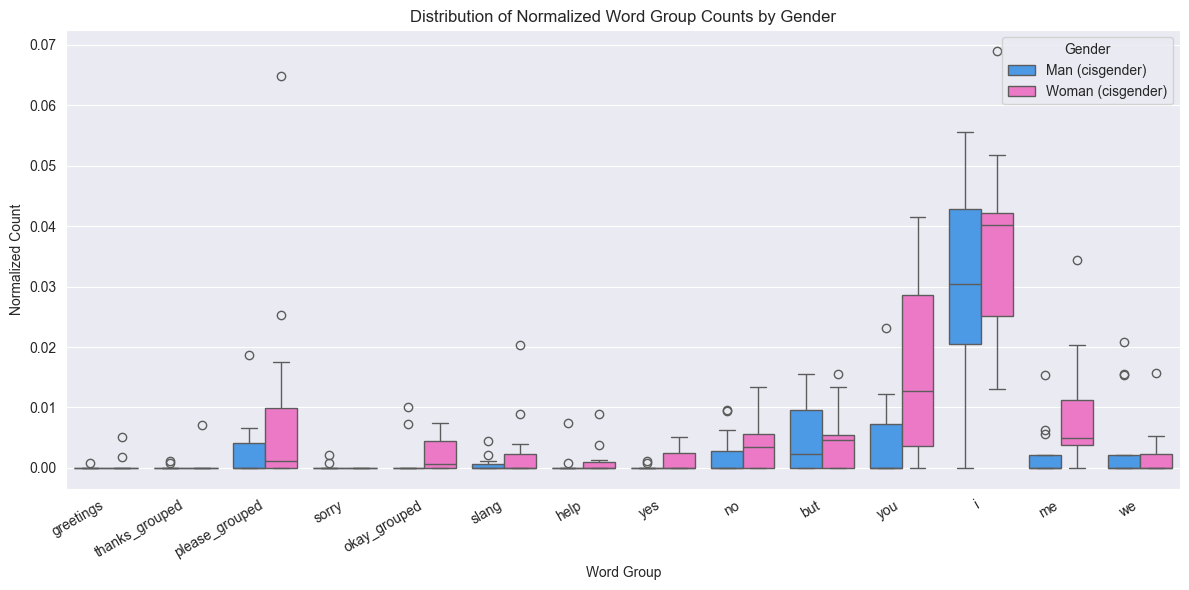

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_prompts = user_prompts[user_prompts['gender'].isin(['Man (cisgender)', 'Woman (cisgender)'])]

columns = [
    'greetings',
    'thanks_grouped',
    'please_grouped',
    'sorry',
    'okay_grouped',
    'slang',
    'help',
    'yes',
    'no',
    'but',
    'you',
    'i',
    'me',
    'we'
]

df_long = filtered_prompts.melt(
    id_vars=['gender'],
    value_vars=columns,
    var_name='word_group',
    value_name='normalized_count'
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_long,
    x='word_group',
    y='normalized_count',
    hue='gender',
    palette=['#3399FF', '#FF66CC']
)
plt.title('Distribution of Normalized Word Group Counts by Gender')
plt.ylabel('Normalized Count')
plt.xlabel('Word Group')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.legend(title='Gender')
plt.show()

In [4]:
from helpers.stats import run_t_test_on_gender

run_t_test_on_gender(filtered_prompts, 'please_grouped' )
run_t_test_on_gender(filtered_prompts, 'okay_grouped' )
run_t_test_on_gender(filtered_prompts, 'slang' )
run_t_test_on_gender(filtered_prompts, 'help' )
run_t_test_on_gender(filtered_prompts, 'yes' )
run_t_test_on_gender(filtered_prompts, 'no' )
run_t_test_on_gender(filtered_prompts, 'but' )
run_t_test_on_gender(filtered_prompts, 'you' )
run_t_test_on_gender(filtered_prompts, 'i' )
run_t_test_on_gender(filtered_prompts, 'me' )
run_t_test_on_gender(filtered_prompts, 'we' )


 please_grouped: T-statistic: -1.3384, p-value: 0.2048
 okay_grouped: T-statistic: -0.8262, p-value: 0.4169
 slang: T-statistic: -1.3192, p-value: 0.2120
 help: T-statistic: -0.7136, p-value: 0.4837
 yes: T-statistic: -2.0053, p-value: 0.0691
 no: T-statistic: -1.1418, p-value: 0.2671
 but: T-statistic: 0.2060, p-value: 0.8386
 you: T-statistic: -2.5220, p-value: 0.0238
 i: T-statistic: -0.9758, p-value: 0.3391
 me: T-statistic: -2.2819, p-value: 0.0378
 we: T-statistic: 0.7784, p-value: 0.4446


## Compare Age Groups

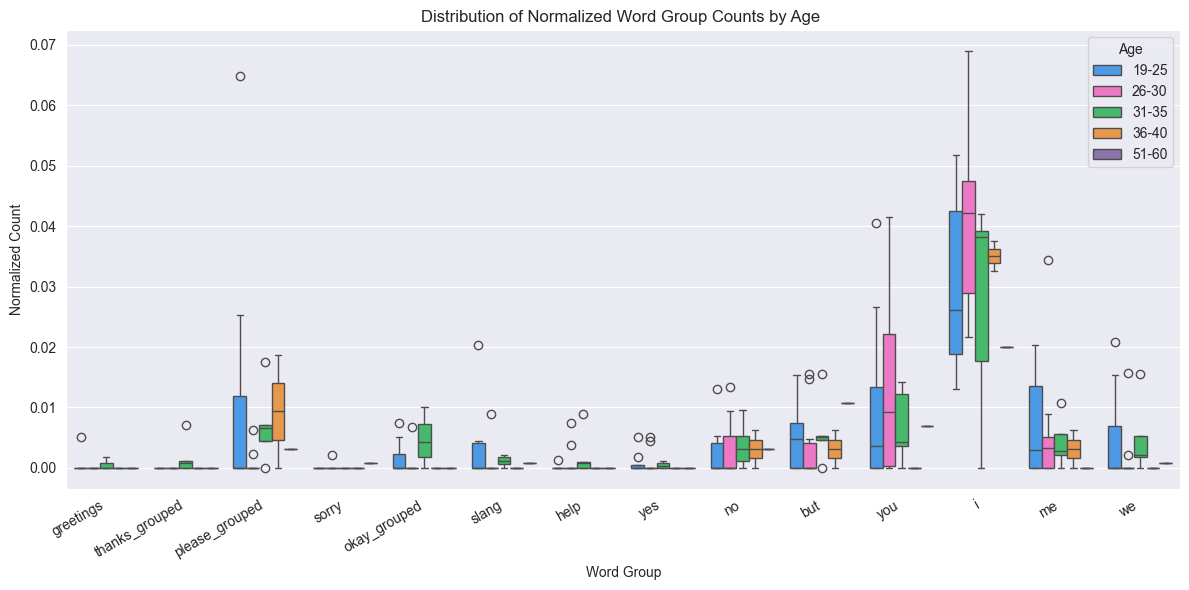

In [6]:
df_long = filtered_prompts.melt(
    id_vars=['age'],
    value_vars=columns,
    var_name='word_group',
    value_name='normalized_count'
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_long,
    x='word_group',
    y='normalized_count',
    hue='age',
    palette=['#3399FF', '#FF66CC', '#33CC66', '#FF9933', '#8C6BB1']
)
plt.title('Distribution of Normalized Word Group Counts by Age ')
plt.ylabel('Normalized Count')
plt.xlabel('Word Group')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.legend(title='Age')
plt.show()